In [41]:
import numpy as np

w = np.array([[0.5, 1.3, 3.3], [3.2, 3, 4]]) #2 rows and 3 coloumns.
d = np.array([0.3, 0.2, 0.4])

w = w-0.1*d
print(d.shape) #it will print the number of rows and coloumns.
print(w) #will print solution of last equation.

(3,)
[[0.47 1.28 3.26]
 [3.17 2.98 3.96]]


In [42]:
import numpy as np
import math, copy
import matplotlib.pyplot as plt
# from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients #i could not insall it


In [43]:
# x_train is the input variable (size in 1000 square feet)
# y_train is the target (price in 1000s of dollars)
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [1. 2.]
y_train = [300. 500.]


In [44]:
# m is the number of training examples
m = len(x_train)
print(f"Number of training examples is: {m}")

Number of training examples is: 2


In [45]:
i = 0 # Change this to 1 to see (x^1, y^1)

x_i = x_train[i]
y_i = y_train[i]
print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")

(x^(0), y^(0)) = (1.0, 300.0)


In [46]:
# Like methode in java 
def compute_model_output(x, w, b):
    # this is like a commint
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples 
      w,b (scalar)    : model parameters  
    Returns
      f_wb (ndarray (m,)): model prediction
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

In [47]:
w = 200  #for 𝑥(0) f_wb = w * x[0] + b
b = 100
print(f"w: {w}")
print(f"b: {b}")

w: 200
b: 100


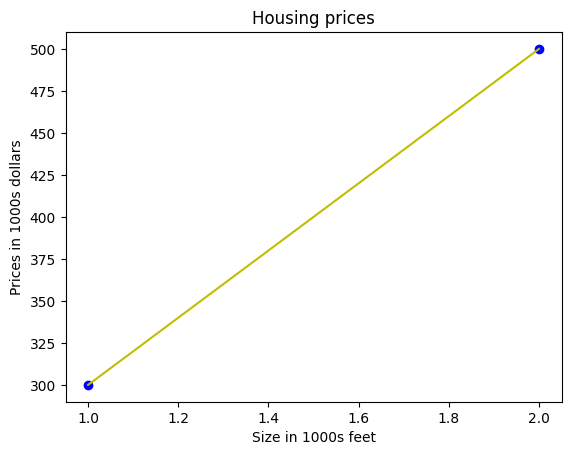

In [52]:
tmp_f_wb = compute_model_output(x_train, w, b)  # call the function/ methode above and store it inside variable tmp_f_wb

# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='y', label='Our Prediction') # c for colour and y means yellow line

# Plot the data points
plt.scatter(x_train, y_train, marker='o', c='b', label='Actual Values') # marker for shape of points on graph and o means # it will appear as a dot
# writting the title 
plt.title('Housing prices')
# Y axis title
plt.ylabel('Prices in 1000s dollars')
# X axis title
plt.xlabel('Size in 1000s feet')
# to show the grahp
plt.show()

In [49]:
# to get the price of certain size
w = 200                         
b = 100    
x_i = 1.2
cost_1200sqft = w * x_i + b    

print(f"${cost_1200sqft:.0f} thousand dollars")

$340 thousand dollars


In [ ]:
def compute_cost(x, y, w, b): # Computting the average cost using cost function

    # number of training examples
    m = x.shape[0] # can be written as m = len(x)
    
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  # **2 for square result
        cost_sum = cost_sum + cost  #we can write cost cost + (f_wb - y[i]) ** 2, and remove cost_sum
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

In [ ]:
def compute_gradient(x, y, w, b): # to compute derivative of w and b for gradiant descent
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

In [ ]:
#plt_gradients(x_train,y_train, compute_cost, compute_gradient) #plt_gradients is not working
plt.show()

In [ ]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): # function to calculate gradiant descent itself with alpha learning rate
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b]) #for parameters w and b
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

In [ ]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

In [ ]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

In [ ]:
#plot the divergence of large alpha value, if we change alpha value to 8.08.0e-1 and low iterations = 10
plt_divergence(p_hist, J_hist,x_train, y_train) 
plt.show()